<a href="https://colab.research.google.com/github/subair99/ML_Zoomcamp_2022/blob/main/ML_Zoomcamp_Session__2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

### Dataset
In this homework, we will use the California Housing Prices. You can take it from Kaggle.

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

### EDA
Load the data.
Look at the median_house_value variable. Does it have a long tail?
Features
For the rest of the homework, you'll need to use only these columns:

  1. 'latitude',
  2. 'longitude',
  3. 'housing_median_age',
  4. 'total_rooms',
  5. 'total_bedrooms',
  6. 'population',
  7. 'households',
  8. 'median_income',
  9. 'median_house_value'
  10. Select only them.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/ML_Zoomcamp_2022

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ML_Zoomcamp_2022


In [4]:
# Read dataset to dataframe
df = pd.read_csv('ML_Zoomcamp_Session_#2_data.csv')

### Question 1
Find a feature with missing values. How many missing values does it have?

  1. 207
  2. 307
  3. 408
  4. 508

In [5]:
# Find total null values
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Answer: 207

### Question 2
What's the median (50% percentile) for variable 'population'?

1. 1133
2. 1122
3. 1166
4. 1188

In [6]:
# Find population median
df.population.median()

1166.0

Answer: 1166

### Split the data
1. Shuffle the initial dataset, use seed 42.
2. Split your data in train/val/test sets, with 60%/20%/20% distribution.
3. Make sure that the target value ('median_house_value') is not in your dataframe.
4. Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [7]:
# Check dataframe head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Check unique values of ocean_proximity
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
# Remove space and caps in ocean_proximity values
df.ocean_proximity = df.ocean_proximity.str.lower().str.replace(' ', '_')

In [10]:
# Confirm space and caps removal
df.ocean_proximity.unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [12]:
# Set seed at 42
np.random.seed(42)

# Get length of the housing dataset
n = len(df)

# Shuffle the initial dataset with seed
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [13]:
# Check df_shuffled
df_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,inland
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,inland
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,near_bay
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1h_ocean
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,near_ocean


In [14]:
# Split train/val/test sets, with 60%/20%/20% distribution
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [15]:
# Extract median_house_value apply log and delete from dataframe
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3
1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?
Options:

1. With 0
2. With mean
3. With median
4. Both are equally good

In [16]:
# Baseline solution
base = ['longitude',
        'latitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income']

# Prepare data function
def prepare_X(df, put):
  df_num = df[base]
  df_num = df_num.fillna(put)
  X = df_num.values
  return X

# Linear regression function
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0], w[1:]

# RSME function
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

In [17]:
# Linear regression for fill = 0
put = 0

X_train = prepare_X(df_train, put)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

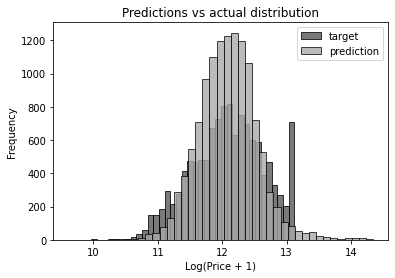

In [18]:
# Plot solution for fill = 0
plt.figure(figsize=(6, 4))
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

In [19]:
# Calculate train and val rmse for fill = 0
train_rmse = rmse(y_train, y_pred)

X_val = prepare_X(df_val, put)
y_pred = w_0 + X_val.dot(w)

val_rmse = rmse(y_val, y_pred)

In [20]:
print(f'Training RMSE for fill = median: {round(train_rmse, 2)}')
print(f'Validation RMSE for fill = median: {round(val_rmse, 2)}')

Training RMSE for fill = median: 0.34
Validation RMSE for fill = median: 0.33


In [21]:
# Linear regression for fill = mean
put = df_train.total_bedrooms.mean()

X_train = prepare_X(df_train, put)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

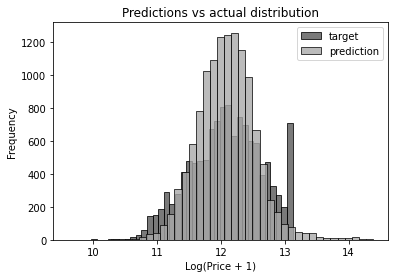

In [22]:
# Plot solution for fill = mean
plt.figure(figsize=(6, 4))
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

In [23]:
# Calculate train and val rmse for fill = mean
train_rmse = rmse(y_train, y_pred)

X_val = prepare_X(df_val, put)
y_pred = w_0 + X_val.dot(w)

val_rmse = rmse(y_val, y_pred)

In [24]:
print(f'Training RMSE for fill = median: {round(train_rmse, 2)}')
print(f'Validation RMSE for fill = median: {round(val_rmse, 2)}')

Training RMSE for fill = median: 0.34
Validation RMSE for fill = median: 0.33


In [25]:
# Linear regression for fill = median
put = df_train.total_bedrooms.median()

X_train = prepare_X(df_train, put)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

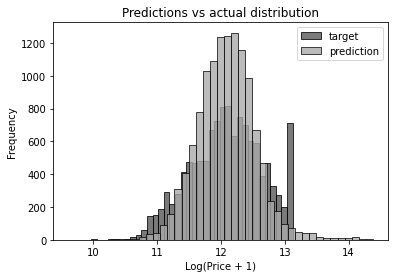

In [26]:
# Plot solution fill = median
plt.figure(figsize=(6, 4))
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

In [27]:
# Calculate train and val rmse for fill = median
train_rmse = rmse(y_train, y_pred)

X_val = prepare_X(df_val, put)
y_pred = w_0 + X_val.dot(w)

val_rmse = rmse(y_val, y_pred)

In [28]:
print(f'Training RMSE for fill = median: {round(train_rmse, 2)}')
print(f'Validation RMSE for fill = median: {round(val_rmse, 2)}')

Training RMSE for fill = median: 0.34
Validation RMSE for fill = median: 0.33


Answer: Both are equally good, rounding the result to two decimal places show that all the fill methods have the same value of 0.33

### Question 4
1. Now let's train a regularized linear regression.
2. For this question, fill the NAs with 0.
3. Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
4. Use RMSE to evaluate the model on the validation dataset.
5. Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

1. 0
2. 0.000001
3. 0.001
4. 0.0001

In [29]:
# Regulirization function
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [30]:
put = 0
X_train = prepare_X(df_train, put)

In [31]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[2], w[7]))

    0, -11.69, 0.00, 0.17
1e-06, -11.69, 0.00, 0.17
0.0001, -11.69, 0.00, 0.17
0.001, -11.67, 0.00, 0.17
 0.01, -11.53, 0.00, 0.17
  0.1, -10.27, 0.00, 0.17
    1, -4.92, 0.00, 0.18
    5, -1.48, 0.00, 0.19
   10, -0.79, 0.00, 0.19


In [32]:
X_train = prepare_X(df_train, put)
X_val = prepare_X(df_val, put)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

  y_pred_t = w_0 + X_train.dot(w)
  print('train:', round(rmse(y_train, y_pred_t), 2))

  y_pred_v = w_0 + X_val.dot(w)
  print('val:', round(rmse(y_val, y_pred_v), 2))

  print()

train: 0.34
val: 0.33

train: 0.34
val: 0.33

train: 0.34
val: 0.33

train: 0.34
val: 0.33

train: 0.34
val: 0.33

train: 0.34
val: 0.33

train: 0.35
val: 0.33

train: 0.35
val: 0.34

train: 0.35
val: 0.34



Answer: r = 0.001 gives the best RMSE

### Question 5
1. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
2. Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
3. For each seed, do the train/validation/test split with 60%/20%/20% distribution.
4. Fill the missing values with 0 and train a model without regularization.
5. For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
6. What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
7. Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

1. 0.16
2. 0.00005
3. 0.005
4. 0.15555

In [33]:
# Check df head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [34]:
# Check df tail
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,inland


In [35]:
# Check df missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

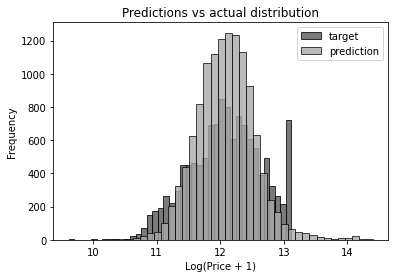

Training RMSE for seed = 0: 0.34289
Validation RMSE for seed = 0: 0.33884



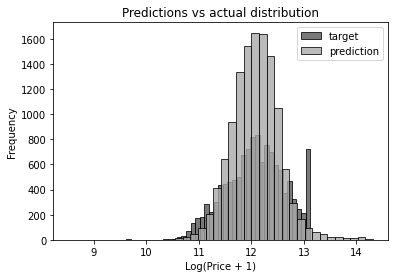

Training RMSE for seed = 1: 0.34347
Validation RMSE for seed = 1: 0.33624



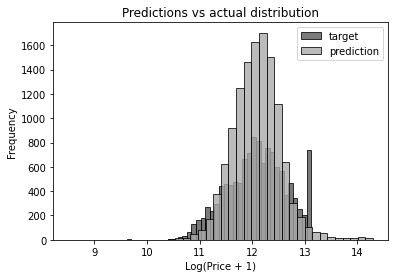

Training RMSE for seed = 2: 0.34144
Validation RMSE for seed = 2: 0.33209



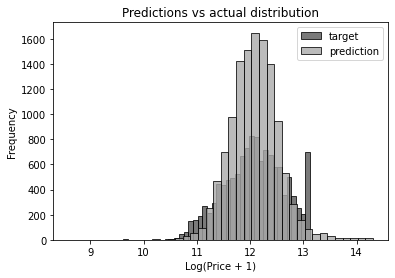

Training RMSE for seed = 3: 0.34246
Validation RMSE for seed = 3: 0.34052



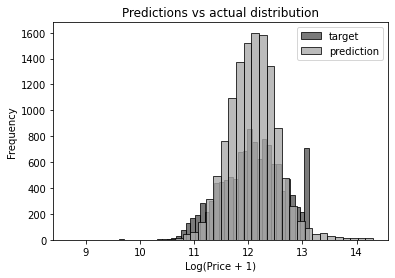

Training RMSE for seed = 4: 0.34319
Validation RMSE for seed = 4: 0.3389



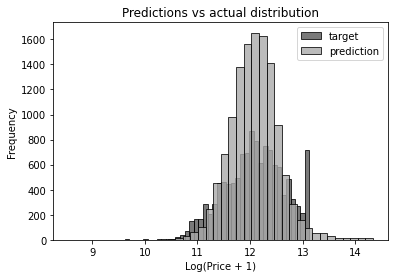

Training RMSE for seed = 5: 0.34185
Validation RMSE for seed = 5: 0.34349



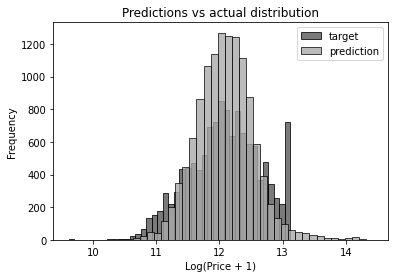

Training RMSE for seed = 6: 0.33909
Validation RMSE for seed = 6: 0.3452



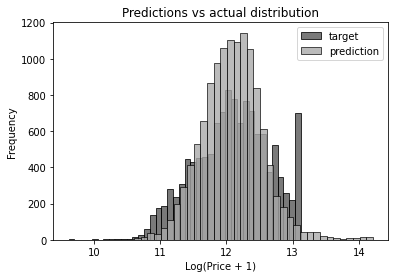

Training RMSE for seed = 7: 0.33992
Validation RMSE for seed = 7: 0.3396



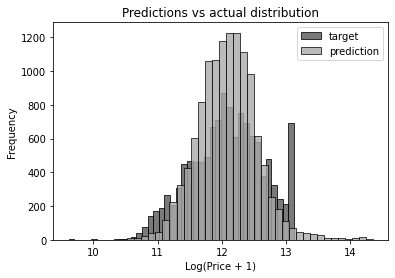

Training RMSE for seed = 8: 0.33667
Validation RMSE for seed = 8: 0.34662



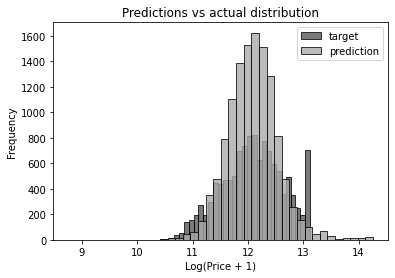

Training RMSE for seed = 9: 0.34097
Validation RMSE for seed = 9: 0.33659



In [36]:
# Try different random seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
val_all_rmse = []

for item in seeds:
  np.random.seed(item)

  n = len(df)

  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  y_train_orig = df_train.median_house_value.values
  y_val_orig = df_val.median_house_value.values
  y_test_orig = df_test.median_house_value.values

  y_train = np.log1p(y_train_orig)
  y_val = np.log1p(y_val_orig)
  y_test = np.log1p(y_test_orig)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']


  # Baseline solution
  base = ['longitude',
          'latitude',
          'housing_median_age',
          'total_rooms',
          'total_bedrooms',
          'population',
          'households',
          'median_income']


  # Prepare data function
  def prepare_X(df):
      df_num = df[base]
      df_num = df_num.fillna(0)
      X = df_num.values
      return X


  # Linear regression function
  def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]


  # RSME function
  def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


  # Linear regression
  X_train = prepare_X(df_train)
  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_train.dot(w)


  # Plot histogram of predictions and values
  plt.figure(figsize=(6, 4))

  sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
  sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

  plt.legend()

  plt.ylabel('Frequency')
  plt.xlabel('Log(Price + 1)')
  plt.title('Predictions vs actual distribution')

  plt.show()


  # Calculate RMSEs
  train_rmse = rmse(y_train, y_pred)
  X_val = prepare_X(df_val)
  y_pred = w_0 + X_val.dot(w)
  val_rmse = rmse(y_val, y_pred)
  val_all_rmse.append(val_rmse)

  print(f'Training RMSE for seed = {item}: {round(train_rmse, 5)}')
  print(f'Validation RMSE for seed = {item}: {round(val_rmse, 5)}')
  print()

In [37]:
# Calculate std of all val rmse
round(np.std(val_all_rmse), 3)

0.004

Answer: 0.005

### Question 6
1. Split the dataset like previously, use seed 9.
2. Combine train and validation datasets.
3. Fill the missing values with 0 and train a model with r=0.001.
4. What's the RMSE on the test dataset?

Options:

1. 0.35
2. 0.135
3. 0.450
4. 0.245

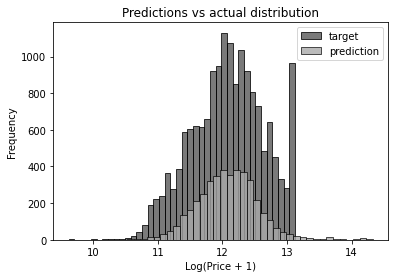

Training RMSE for seed = 9: 0.34
Validation RMSE for seed = 9: 0.345


In [44]:
np.random.seed(9)

n = len(df)

n_test = int(0.2 * n)
n_train = n -  n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


# Baseline solution
base = ['longitude',
        'latitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income']


# Prepare data function
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


# Regularization function
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


# RSME function
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)


# Linear regression with regularization
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)
y_pred = w_0 + X_train.dot(w)
train_rmse = rmse(y_train, y_pred)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
val_rmse = rmse(y_val, y_pred)


# Plot histogram of predictions and values
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()


# Print RMSEs
print(f'Training RMSE for seed = {item}: {round(train_rmse, 3)}')
print(f'Validation RMSE for seed = {item}: {round(val_rmse, 3)}')

Answer: 0.35